In [1]:
import pandas as pd

In [2]:
url = "Automobile_data.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
import numpy as np

In [7]:
df = df.replace("?", np.nan)

In [8]:
#df.head()

## Drop Nan Values

In [9]:
#you cannot replace nan with mean values as "symboling" contains'+' and '-',so covert nan to 0.

In [10]:
df= df.replace(np.nan,0)

In [11]:
#df.head()

## Converting some wrong "object" to "int" using "astype"

In [12]:
df['normalized-losses']= df['normalized-losses'].astype('int64')

In [13]:
df['normalized-losses'].dtypes

dtype('int64')

In [14]:
df['bore']= df['bore'].astype('float64')

In [15]:
df['bore'].dtypes

dtype('float64')

In [16]:
df['stroke']= df['stroke'].astype('float64')

In [17]:
df['stroke'].dtypes

dtype('float64')

In [18]:
df['horsepower']= df['horsepower'].astype('int64')

In [19]:
df['horsepower'].dtypes

dtype('int64')

In [20]:
df['peak-rpm']= df['peak-rpm'].astype('int64')

In [21]:
df['peak-rpm'].dtypes

dtype('int64')

In [22]:
df['price']= df['price'].astype('int64')

In [23]:
#df.info()

In [24]:
df['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [25]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [26]:
df['num-of-doors'].value_counts()

four    114
two      89
0         2
Name: num-of-doors, dtype: int64

In [27]:
df['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [28]:
df['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [29]:
df['engine-location'].value_counts()

front    202
rear       3
Name: engine-location, dtype: int64

In [30]:
df['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [31]:
df['num-of-cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [32]:
df['fuel-system'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuel-system, dtype: int64

## Categorical to numerical Transformation

### 1. Using Sklearn---OneHotEncoder

In [33]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(df[["body-style"]])
dfone = pd.DataFrame(X.toarray(),columns = onehotencoder.categories_)
df = pd.concat([df,dfone], axis = 1)
df = df.drop(['body-style'],axis = 1)

In [34]:
#df.head()

In [35]:
#df.info()

In [36]:
X = onehotencoder.fit_transform(df[["engine-type"]])
dfone2 = pd.DataFrame(X.toarray(),columns = onehotencoder.categories_)
df = pd.concat([df,dfone2], axis = 1)
df = df.drop(['engine-type'],axis = 1)

In [37]:
X = onehotencoder.fit_transform(df[["fuel-system"]])
dfone3 = pd.DataFrame(X.toarray(),columns = onehotencoder.categories_)
df = pd.concat([df,dfone3], axis = 1)
df = df.drop(['fuel-system'],axis = 1)

In [38]:
X = onehotencoder.fit_transform(df[["make"]])
dfone3 = pd.DataFrame(X.toarray(),columns = onehotencoder.categories_)
df = pd.concat([df,dfone3], axis = 1)
df = df.drop(['make'],axis = 1)

In [39]:
#df.head(20)

In [40]:
#df.info()

# By Replacing values with num

In [41]:
df['engine-location'].replace({"front":"0","rear":"1"},inplace = True)
df['engine-location']= df['engine-location'].astype('int64')

In [42]:
df['num-of-doors'].replace({"four":"4","two":"2"},inplace = True)
df['num-of-doors']= df['num-of-doors'].astype('int64')

In [43]:
df['aspiration'].replace({"std":"0","turbo":"1"},inplace = True)
df['aspiration']= df['aspiration'].astype('int64')

In [44]:
df['num-of-cylinders'].replace({"two":"2","three":"3","four":"4","five":"5","six":"6","eight":"8","twelve":"12"},inplace = True)
df['num-of-cylinders']= df['num-of-cylinders'].astype('int64')

In [45]:
df['drive-wheels'] = df['drive-wheels'].replace('4wd','fwd') #wrong spelling

In [46]:
df['drive-wheels'].replace({"fwd":"0","rwd":"1"},inplace = True)
df['drive-wheels']= df['drive-wheels'].astype('int64')

In [47]:
df['fuel-type'].replace({"gas":"0","diesel":"1"},inplace = True)
df['fuel-type']= df['fuel-type'].astype('int64')

In [48]:
#df.head(10)

In [49]:
#df.info()

In [50]:
#splitting car company from car name(make)

In [51]:
#car_company = df["make"].str.split(" ", n = 1, expand = True)
#df['CarCompany'] = car_company[0]

# Dropping 'CarName=Make' column
#df.drop('make',axis=1,inplace=True)
#df.head()

### 2.Using Pandas---it automaatically drops fuel-type from dataset

In [52]:
#df=pd.get_dummies(df,columns=["fuel-type"],prefix=["fuel-type"]).head()

In [53]:
df.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,"(nissan,)","(peugot,)","(plymouth,)","(porsche,)","(renault,)","(saab,)","(subaru,)","(toyota,)","(volkswagen,)","(volvo,)"
0,3,0,0,0,2,1,0,88.6,168.8,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,0,0,0,2,1,0,88.6,168.8,64.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,2,1,0,94.5,171.2,65.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,164,0,0,4,0,0,99.8,176.6,66.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,164,0,0,4,0,0,99.4,176.6,66.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   fuel-type          205 non-null    int64  
 3   aspiration         205 non-null    int64  
 4   num-of-doors       205 non-null    int64  
 5   drive-wheels       205 non-null    int64  
 6   engine-location    205 non-null    int64  
 7   wheel-base         205 non-null    float64
 8   length             205 non-null    float64
 9   width              205 non-null    float64
 10  height             205 non-null    float64
 11  curb-weight        205 non-null    int64  
 12  num-of-cylinders   205 non-null    int64  
 13  engine-size        205 non-null    int64  
 14  bore               205 non-null    float64
 15  stroke             205 non-null    float64
 16  compression-ratio  205 non

# Check distribution of 0,1 in Dataset

In [55]:
df['aspiration'].value_counts()

0    168
1     37
Name: aspiration, dtype: int64

In [56]:
df['engine-location'].value_counts()

0    202
1      3
Name: engine-location, dtype: int64

In [57]:
df['drive-wheels'].value_counts()

0    129
1     76
Name: drive-wheels, dtype: int64

In [58]:
df['fuel-type'].value_counts()

0    185
1     20
Name: fuel-type, dtype: int64

# Plotting Histograms

array([[<AxesSubplot:title={'center':'symboling'}>,
        <AxesSubplot:title={'center':'normalized-losses'}>,
        <AxesSubplot:title={'center':'fuel-type'}>,
        <AxesSubplot:title={'center':'aspiration'}>,
        <AxesSubplot:title={'center':'num-of-doors'}>,
        <AxesSubplot:title={'center':'drive-wheels'}>,
        <AxesSubplot:title={'center':'engine-location'}>,
        <AxesSubplot:title={'center':'wheel-base'}>],
       [<AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb-weight'}>,
        <AxesSubplot:title={'center':'num-of-cylinders'}>,
        <AxesSubplot:title={'center':'engine-size'}>,
        <AxesSubplot:title={'center':'bore'}>,
        <AxesSubplot:title={'center':'stroke'}>],
       [<AxesSubplot:title={'center':'compression-ratio'}>,
        <AxesSubplot:title={'center':'horsepower'}>,
        <AxesSubplot:title={'center':'

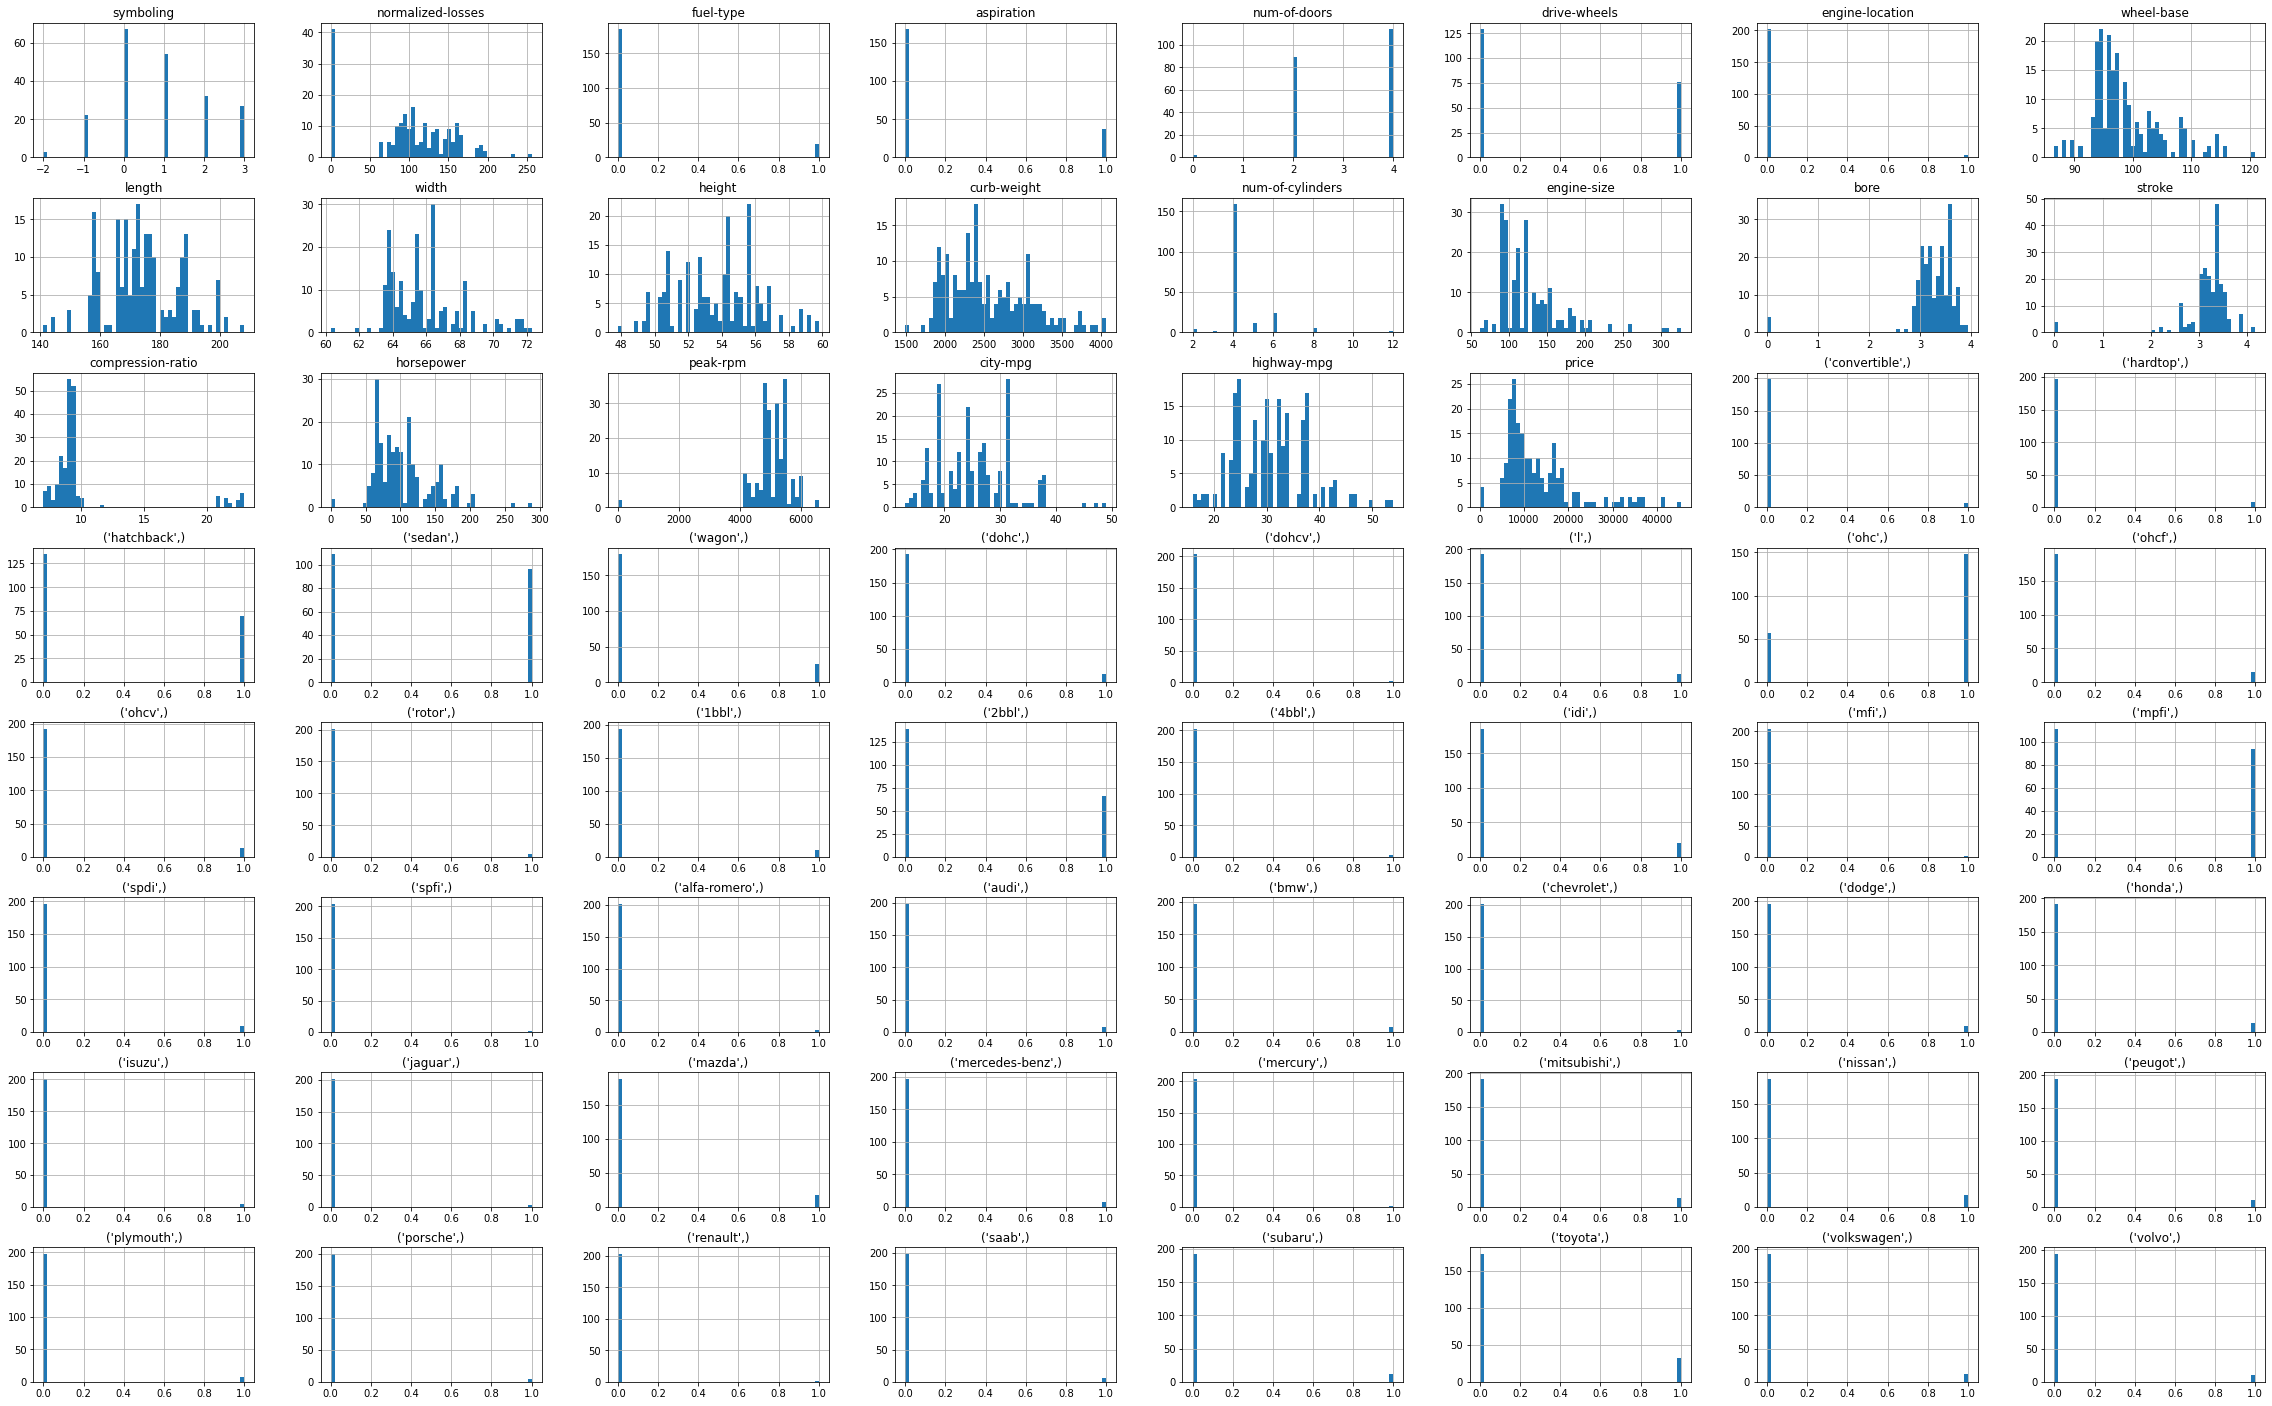

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(40,25))

# Train-Test Splitting

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
train_set,test_set = train_test_split(df,test_size = 0.2 , random_state = 42)

In [62]:
print(f"Rows in train set:{len(train_set)}\n Rows in test set:{len(test_set)}\n")

Rows in train set:164
 Rows in test set:41



In [63]:
# equal distribution of 0,1--------------using Stratified Sampling

In [64]:
from sklearn.model_selection import StratifiedShuffleSplit

In [65]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)

In [66]:
for train_index,test_index in split.split(df,df['fuel-type'],df['drive-wheels']):
    strat_train_set= df.loc[train_index]
    strat_test_set= df.loc[test_index]

In [67]:
for train_index,test_index in split.split(df,df['aspiration'],df['engine-location']):
        strat_train_set= df.loc[train_index]
        strat_test_set= df.loc[test_index]    

In [68]:
#strat_test_set

In [69]:
strat_test_set.describe()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,"(nissan,)","(peugot,)","(plymouth,)","(porsche,)","(renault,)","(saab,)","(subaru,)","(toyota,)","(volkswagen,)","(volvo,)"
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.829268,97.268293,0.195122,0.170732,2.926829,0.463415,0.048780,98.631707,175.331707,66.146341,...,0.073171,0.048780,0.024390,0.048780,0.024390,0.024390,0.048780,0.170732,0.048780,0.121951
std,1.563689,56.662167,0.401218,0.380949,1.104315,0.504854,0.218085,5.642891,10.471281,1.793753,...,0.263652,0.218085,0.156174,0.218085,0.156174,0.156174,0.218085,0.380949,0.218085,0.331295
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.600000,157.300000,63.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,74.000000,0.000000,0.000000,2.000000,0.000000,0.000000,95.300000,168.900000,64.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,103.000000,0.000000,0.000000,2.000000,0.000000,0.000000,97.200000,174.600000,66.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,134.000000,0.000000,0.000000,4.000000,1.000000,0.000000,103.300000,186.600000,67.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,197.000000,1.000000,1.000000,4.000000,1.000000,1.000000,110.000000,193.800000,70.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
strat_test_set['aspiration'].value_counts()

0    34
1     7
Name: aspiration, dtype: int64

In [71]:
strat_train_set['aspiration'].value_counts()

0    134
1     30
Name: aspiration, dtype: int64

In [72]:
strat_test_set['fuel-type'].value_counts()

0    33
1     8
Name: fuel-type, dtype: int64

In [73]:
strat_train_set['fuel-type'].value_counts()

0    152
1     12
Name: fuel-type, dtype: int64

In [74]:
strat_test_set['drive-wheels'].value_counts()

0    22
1    19
Name: drive-wheels, dtype: int64

In [75]:
strat_train_set['drive-wheels'].value_counts()

0    107
1     57
Name: drive-wheels, dtype: int64

In [76]:
# therefore all 0s and 1s are equally distributed in test and train data

In [77]:
df = strat_train_set.copy()

# Looking For Correlations

In [78]:
corr_matrix = df.corr()

In [79]:
corr_matrix['curb-weight'].sort_values(ascending=False)

curb-weight          1.000000
length               0.885975
width                0.864571
engine-size          0.854440
price                0.815834
                       ...   
normalized-losses   -0.308032
(ohc,)              -0.413154
(2bbl,)             -0.588678
city-mpg            -0.786349
highway-mpg         -0.815744
Name: curb-weight, Length: 64, dtype: float64

# Plotting Graphs

In [80]:
from pandas.plotting import scatter_matrix
attributes = ["price","length","width","height"]

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='length', ylabel='price'>,
        <AxesSubplot:xlabel='width', ylabel='price'>,
        <AxesSubplot:xlabel='height', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='length'>,
        <AxesSubplot:xlabel='length', ylabel='length'>,
        <AxesSubplot:xlabel='width', ylabel='length'>,
        <AxesSubplot:xlabel='height', ylabel='length'>],
       [<AxesSubplot:xlabel='price', ylabel='width'>,
        <AxesSubplot:xlabel='length', ylabel='width'>,
        <AxesSubplot:xlabel='width', ylabel='width'>,
        <AxesSubplot:xlabel='height', ylabel='width'>],
       [<AxesSubplot:xlabel='price', ylabel='height'>,
        <AxesSubplot:xlabel='length', ylabel='height'>,
        <AxesSubplot:xlabel='width', ylabel='height'>,
        <AxesSubplot:xlabel='height', ylabel='height'>]], dtype=object)

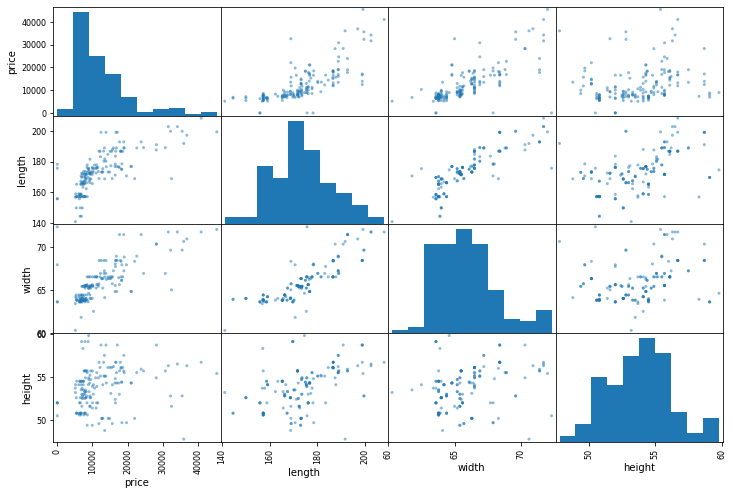

In [81]:
scatter_matrix(df[attributes],figsize=(12,8))

<AxesSubplot:xlabel='height', ylabel='price'>

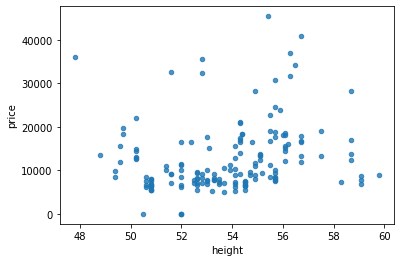

In [82]:
df.plot(kind="scatter",x="height",y="price",alpha=0.8)

# Splitting Features and Labels

In [83]:
df= strat_train_set.drop("price",axis=1)
df_labels = strat_train_set["price"].copy()

In [84]:
df.head()

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,width,...,"(nissan,)","(peugot,)","(plymouth,)","(porsche,)","(renault,)","(saab,)","(subaru,)","(toyota,)","(volkswagen,)","(volvo,)"
173,-1,65,0,0,4,0,0,102.4,175.6,66.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48,0,0,0,0,4,1,0,113.0,199.6,69.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,0,85,0,0,4,0,0,96.5,175.4,65.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,2,137,0,0,2,0,0,86.6,144.6,63.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
191,0,0,0,0,4,0,0,100.4,180.2,66.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [85]:
df_labels.head()

173     8948
48     35550
39      8845
31      6855
191    13295
Name: price, dtype: int64

# Create Pipeline

In [86]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [87]:
my_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")),
                       ('std_scaler',StandardScaler())])

In [88]:
df_num = my_pipeline.fit_transform(df)
df_num.shape

(164, 63)

# Selecting a Desired MODEl for Project

In [89]:
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#model = DecisionTreeRegressor()
#model = LinearRegression()
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [90]:
model.fit(df_num,df_labels)

RandomForestRegressor()

In [91]:
some_data = df.iloc[:5]

In [92]:
some_labels = df_labels.iloc[:5]

# Check Predictions

In [93]:
prepared_data = my_pipeline.transform(some_data)

In [94]:
model.predict(prepared_data)

array([ 9490.86, 34584.  ,  9021.5 ,  6339.97, 14275.81])

In [95]:
list(some_labels)

[8948, 35550, 8845, 6855, 13295]

In [96]:
# predictions are fine not best...

# Evaluating The Model

In [97]:
from sklearn.metrics import mean_squared_error

In [98]:
df_predictions = model.predict(df_num)

In [99]:
#lin_mse = mean_squared_error(df_labels,df_predictions)
mse = mean_squared_error(df_labels,df_predictions)

In [100]:
#lin_rmse = np.sqrt(lin_mse)
rmse = np.sqrt(mse)

In [101]:
#lin_rmse
rmse

1517.8679942148835

# using Better Evaluation Technique--(CROSS_VALIDATION)

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
scores = cross_val_score(model,df_num,df_labels,scoring="neg_mean_squared_error",cv=10)

In [104]:
rmse_scores= np.sqrt(-scores)

In [105]:
rmse_scores

array([9834.85772409, 2475.49055381, 2491.47210097, 3749.68982592,
       2337.2805561 , 2823.50686737, 1789.27148117, 1961.67749676,
       2132.48872009, 3560.63528919])

In [106]:
# Create a Function

In [107]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard_Deviation:",scores.std())

In [108]:
print_scores(rmse_scores)

Scores: [9834.85772409 2475.49055381 2491.47210097 3749.68982592 2337.2805561
 2823.50686737 1789.27148117 1961.67749676 2132.48872009 3560.63528919]
Mean: 3315.6370615476926
Standard_Deviation: 2256.013519090081


## Saving the model

In [109]:
from joblib import dump,load
dump(model,'Car.joblib')

['Car.joblib']

## Testing the model on test data

In [113]:
X_test = strat_test_set.drop("price",axis=1)
Y_test = strat_test_set["price"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[32237.2    18749.31   27683.     15891.6     7000.04   11186.45
 10401.66   27889.03   16413.17   16498.08   10322.94   26725.89
 13573.12    6429.3225  6668.8695 12362.48   17248.55   12197.12
 17395.38   13343.65   29067.55   10926.05    8265.68    8832.93
  9927.23   17124.33    9437.32    8709.29    8202.95    8125.79
 10141.4     9548.98    8049.51   14578.61   15627.75    9191.95
 15722.94    8147.51    7188.54    5730.17   17803.68  ] [35056, 21485, 37028, 15580, 6695, 11259, 8845, 34028, 15750, 16900, 9895, 41315, 11850, 5348, 6229, 13645, 18420, 10945, 17199, 16500, 25552, 10698, 7975, 10345, 8921, 15998, 10245, 8189, 11595, 7898, 10795, 9639, 7788, 16515, 12940, 9960, 13499, 7689, 7099, 6377, 22470]


In [112]:
final_rmse

3292.9231123349464

In [115]:
prepared_data[0]

array([-1.5898799 , -0.5570628 , -0.28097574, -0.47316022,  0.85282594,
       -0.72987004, -0.07832604,  0.59117218,  0.14699224,  0.29381463,
        0.47472158, -0.39733318, -0.33801593, -0.08361085,  0.07483599,
        0.66956829, -0.32073522, -0.26047709, -1.4267149 ,  0.55353327,
        0.44644375, -0.11111111, -0.19487094, -0.73970927,  1.07605517,
       -0.39361095, -0.2409658 , -0.07832604, -0.2548236 ,  0.58673869,
       -0.26813322, -0.2409658 , -0.11111111, -0.26813322, -0.72987004,
       -0.07832604, -0.28097574, -0.07832604,  1.11650138, -0.22645541,
       -0.07832604, -0.11111111, -0.21115394, -0.21115394, -0.13650473,
       -0.21115394, -0.28097574, -0.15811388, -0.13650473, -0.26813322,
       -0.19487094, -0.07832604, -0.26813322, -0.31728716, -0.2409658 ,
       -0.19487094, -0.13650473, -0.07832604, -0.17733173, -0.2548236 ,
        2.35796522, -0.2548236 , -0.19487094])